# gsdgd

In [2]:
import utilities as u
import gps.preproces_Covid_gps as ppC
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)

In [3]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)



In [4]:
%matplotlib inline

In [5]:
dirPath = "C:\work\dev\dECMT_src\data_all\COVID19_Data\Current"

In [6]:
fp= r"C:\work\dev\dECMT_src\data_all\COVID19_Data\Current\po2_fo2_data20-06-22_10-09-05.869361.csv"
df = pd.read_csv(fp)
df.describe()

,Unnamed: 0,pO2_FiO2,IS_PREGNANT,PATIENT_AGE,ICU_Days,Hospital_Days,C5,INVASIVE VENTILATION,ITU,NIV
count,10737.000000,10737.000000,10737.0,10737.000000,10737.000000,10737.000000,10737.000000,10737.0,10737.000000,10737.000000
mean,5368.000000,24.820374,0.0,57.230791,20.561423,19.672255,0.132532,0.0,0.997206,0.687063
std,3099.649254,105.423871,0.0,11.649813,20.425918,21.075121,0.339084,0.0,0.052788,0.463710
min,0.000000,2.176471,0.0,15.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2684.000000,14.818182,0.0,51.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
50%,5368.000000,20.363636,0.0,60.000000,15.000000,18.000000,0.000000,0.0,1.000000,1.000000
75%,8052.000000,28.499997,0.0,65.000000,45.000000,32.000000,0.000000,0.0,1.000000,1.000000
max,10736.000000,6549.999500,0.0,84.000000,56.000000,66.000000,1.000000,0.0,1.000000,1.000000


In [7]:
list(df.columns)

['Unnamed: 0',
 'STUDY_ID',
 'RECORDED_DATETIME',
 'pO2_FiO2',
 'GENDER',
 'ETHNIC_GROUP',
 'IS_PREGNANT',
 'PATIENT_AGE',
 'ADM_DATETIME',
 'DISCHARGE_DATE',
 'hosp_start',
 'icu_start',
 'ICU_Days',
 'Hospital_Days',
 'C5',
 'INVASIVE VENTILATION',
 'ITU',
 'NIV',
 'ITU_date_start_date',
 'ITU_date_end_date',
 'NIV_date_start_date',
 'NIV_date_end_date',
 'C5_start_date',
 'C5_end_date']

In [8]:
df.head()

,Unnamed: 0,STUDY_ID,RECORDED_DATETIME,pO2_FiO2,GENDER,ETHNIC_GROUP,IS_PREGNANT,PATIENT_AGE,ADM_DATETIME,DISCHARGE_DATE,...,C5,INVASIVE VENTILATION,ITU,NIV,ITU_date_start_date,ITU_date_end_date,NIV_date_start_date,NIV_date_end_date,C5_start_date,C5_end_date
0,0,UHSCOVID_037e2bce,2020-04-14 15:40:00.000,32.066667,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,0,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59
1,1,UHSCOVID_037e2bce,2020-04-14 16:29:00.000,2.176471,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,0,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59
2,2,UHSCOVID_037e2bce,2020-04-14 22:32:00.000,25.666667,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,0,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59
3,3,UHSCOVID_037e2bce,2020-04-14 23:03:00.000,27.599998,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,0,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59
4,4,UHSCOVID_037e2bce,2020-04-15 00:04:00.000,34.750000,M,X,0,41,2020-04-14 15:14:00,2020-04-23 16:10:00,...,1,0,1,1,2020-04-14 21:00:00,2020-04-15 23:56:59,2020-04-16 01:59:00,2020-04-17 04:35:00,2020-04-15 23:57:00,2020-04-20 16:38:59


In [9]:
ids = df['STUDY_ID'].unique()
len(ids)

69

In [10]:
ids


array(['UHSCOVID_037e2bce', 'UHSCOVID_08d33993', 'UHSCOVID_09e14c3d',
       'UHSCOVID_0cd586ea', 'UHSCOVID_1277db7c', 'UHSCOVID_18acfd61',
       'UHSCOVID_18f343c9', 'UHSCOVID_19882a58', 'UHSCOVID_1fbd4777',
       'UHSCOVID_1fc3683b', 'UHSCOVID_264d09be', 'UHSCOVID_273f5dbf',
       'UHSCOVID_2c73b922', 'UHSCOVID_2c91e0eb', 'UHSCOVID_2e716c47',
       'UHSCOVID_316c0e1a', 'UHSCOVID_34072db2', 'UHSCOVID_36565ded',
       'UHSCOVID_38ff5206', 'UHSCOVID_396b46c4', 'UHSCOVID_3d4d1e97',
       'UHSCOVID_403db62e', 'UHSCOVID_4a960d27', 'UHSCOVID_4bb60a4c',
       'UHSCOVID_4eedbea5', 'UHSCOVID_51ccdc5a', 'UHSCOVID_55c0cdd3',
       'UHSCOVID_574066a4', 'UHSCOVID_59b3b756', 'UHSCOVID_5dfc8945',
       'UHSCOVID_61bc87c0', 'UHSCOVID_6d0785dc', 'UHSCOVID_6d78504e',
       'UHSCOVID_702d8fb6', 'UHSCOVID_72badc67', 'UHSCOVID_799def37',
       'UHSCOVID_7d001673', 'UHSCOVID_7e57acdc', 'UHSCOVID_7e5e06db',
       'UHSCOVID_7fb4d018', 'UHSCOVID_81a56f9b', 'UHSCOVID_82a1b278',
       'UHSCOVID_85f

In [11]:
#First id
id = ids[0]
id

'UHSCOVID_037e2bce'

# ICU days

In [12]:
icuDVals = df['ICU_Days'].unique()
icuDVals

array([ 1, 36,  4,  0,  5,  2, 15, 49, 14, 23,  8,  3, 48,  9, 18,  7, 39,
       54,  6, 20, 27, 10, 19, 13, 16, 56, 45], dtype=int64)

# Instantiate a Gaussian Process model

In [13]:
df['pO2_FiO2'].describe()

count    10737.000000
mean        24.820374
std        105.423871
min          2.176471
25%         14.818182
50%         20.363636
75%         28.499997
max       6549.999500
Name: pO2_FiO2, dtype: float64

In [14]:
df1Map = (df['pO2_FiO2']>0) & (df['pO2_FiO2']<300)
df1Map.describe()

count     10737
unique        2
top        True
freq      10732
Name: pO2_FiO2, dtype: object

In [ ]:
df1 = df[df1Map]
df1['pO2_FiO2'].describe()
df1.sort_values(by='pO2_FiO2',inplace=True)
df1.head()



In [ ]:
type(df1)
# pd.Series.sort_values(by='pO2_FiO2',inplace=True)

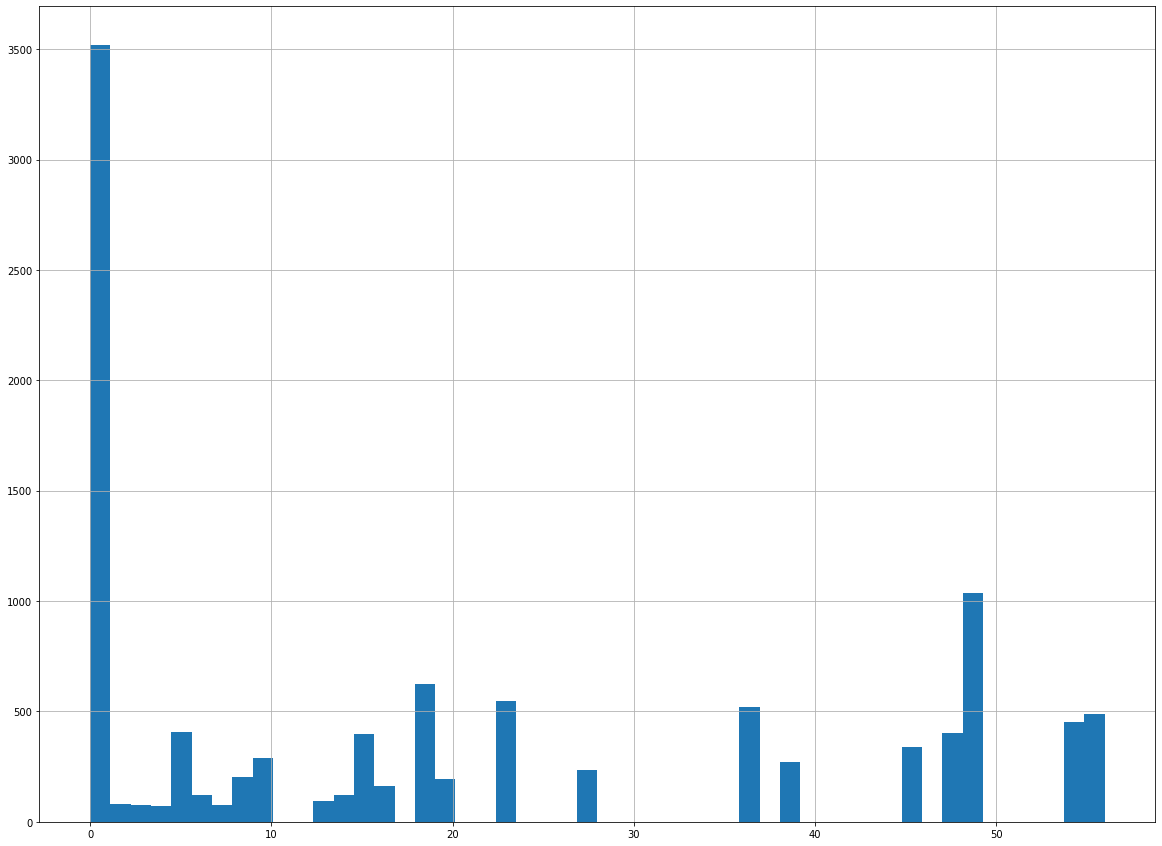

In [17]:
df1['ICU_Days'].hist(bins=50, figsize=(20,15))
# plt.xlim(0,600)
plt.show()


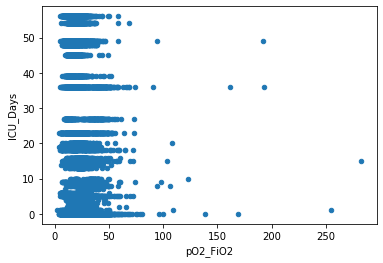

In [36]:
df1.plot(kind='scatter',x='pO2_FiO2',y='ICU_Days')


In [18]:
df1['ICU_Days'].describe()


count    10732.000000
mean        20.571003
std         20.425852
min          0.000000
25%          0.000000
50%         15.000000
75%         45.000000
max         56.000000
Name: ICU_Days, dtype: float64

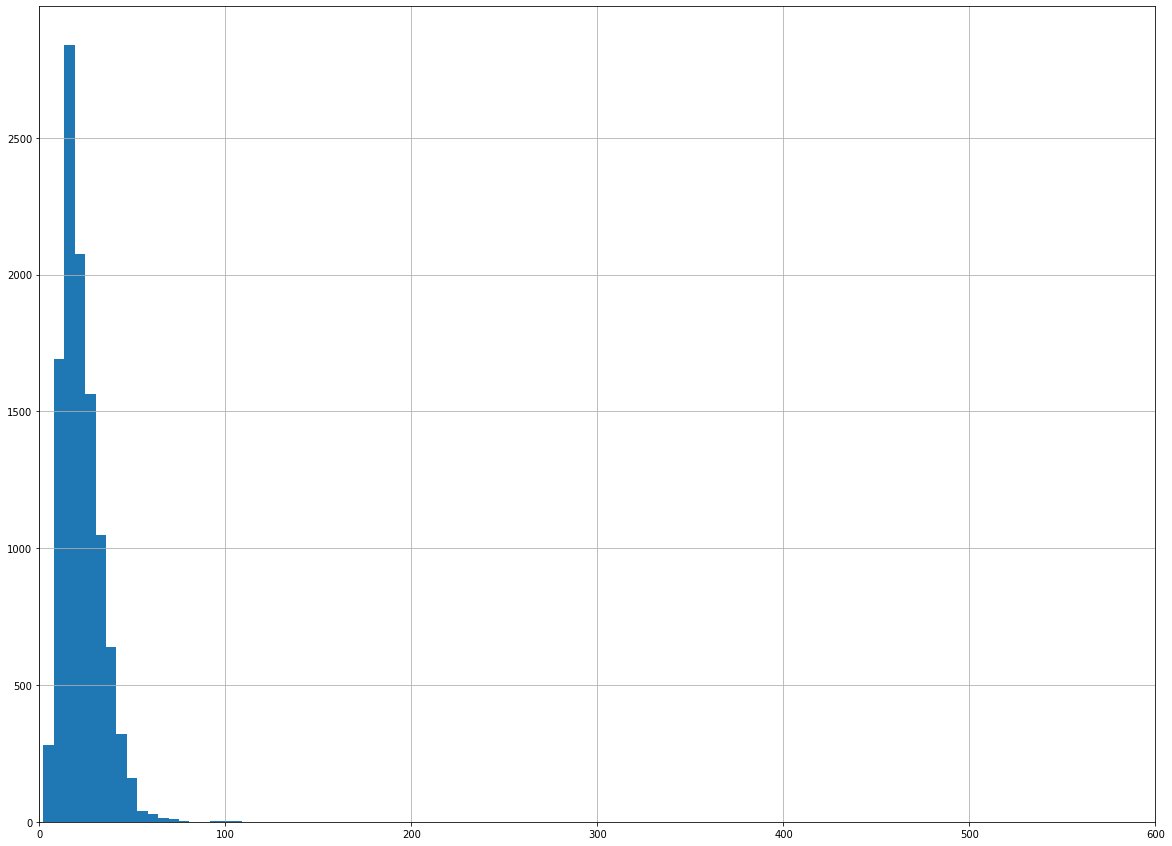

In [19]:
df1['pO2_FiO2'].hist(bins=50, figsize=(20,15))
plt.xlim(0,600)
plt.show()


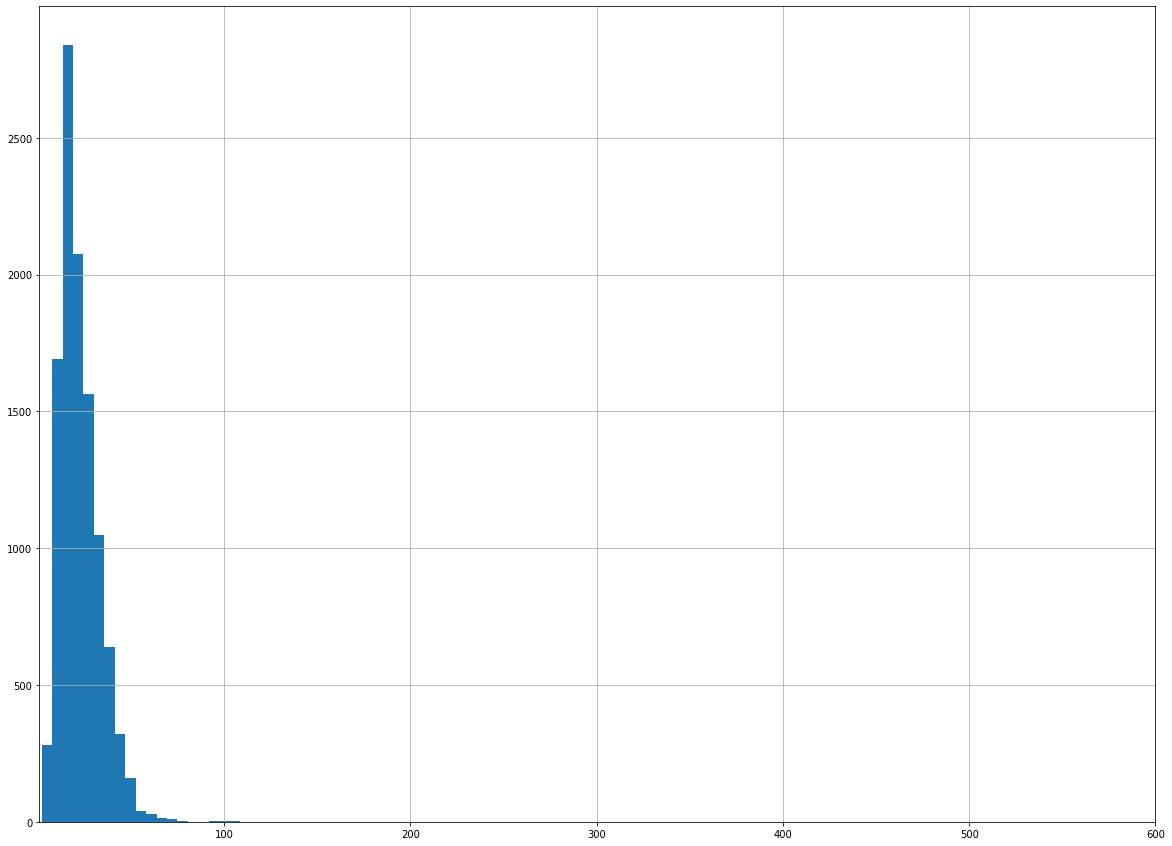

In [20]:
df1['pO2_FiO2'].hist(bins=50, figsize=(20,15))

plt.xlim(1,600)
plt.show()



In [21]:

# y  = df['ICU_Days'].values.reshape(-1,1)
# X  = df['pO2_FiO2'].values.reshape(-1,1)

y  = df1['ICU_Days'].values.reshape(-1,1)
X  = df1['pO2_FiO2'].values.reshape(-1,1)
len(X)

len(X)

10732

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
len(x_train)

9658

In [23]:
len(x_test)


1074

In [24]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x_train, y_train)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [25]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x_test, return_std=True)

C:\Users\sutov\anaconda3\envs\dECMT\lib\site-packages\sklearn\gaussian_process\_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


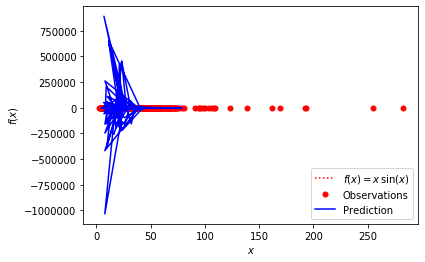

In [26]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
I = x_test.sort()
plt.plot(x_test, y_test, 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x_test, y_pred, 'b-', label='Prediction')
# plt.fill(np.concatenate([x_test, x_test[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
# plt.ylim(-10, 20)
plt.legend(loc='lower right')

In [27]:
I


In [28]:
print(f"len x: {len(x_test)}")
print(f"x described {x_test}")

len x: 1074
x described [[16.26      ]
 [23.77777556]
 [16.93333333]
 ...
 [28.34285714]
 [10.50666667]
 [37.33333333]]


In [29]:
print(f"len y_pred: {len(y_pred)}")
print(f"y_pred described {y_pred}")

len y_pred: 1074
y_pred described [[-2.55022031e+05]
 [ 2.73281250e+01]
 [-8.59375000e-02]
 ...
 [ 1.15312500e+01]
 [ 2.69921875e+01]
 [ 9.65625000e+00]]


# Second
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE

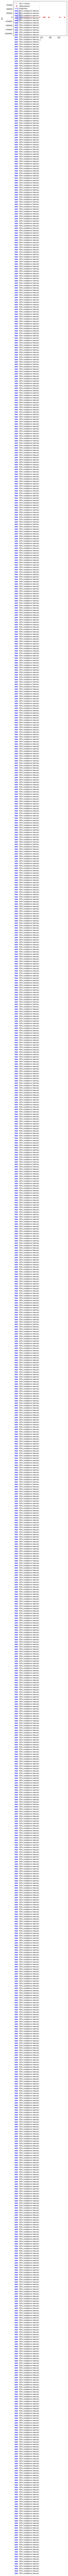

In [30]:
# Second
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x_test, y_test, 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x_test, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x_test, x_test[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,(y_pred + 1.9600 * sigma)[::-1]]),alpha=.5,
         fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
# plt.ylim(-10, 20)
plt.legend(loc='upper left')


In [31]:
sigma

array([1.57721307, 2.58048999, 1.34623461, ..., 2.64180664, 0.        ,
       1.84877493])

In [32]:
len(sigma)

1074

In [33]:
sigma.shape

(1074,)

In [34]:
type(sigma[0,10])

IndexError: too many indices for array

In [ ]:
lb = y_pred - 1.9600 * sigma
lb

In [ ]:
y_pred

In [ ]:
y_pred.shape

In [ ]:
x_test

In [ ]:
x_test.shape